# IPAN - ImageJ Processing Assistant Notebook

## 04 - Nuclei Count
**Use the IPAN module to run the image processing function and analyse the Nuclei for multiple images**

***
### Import Libraries and packages that will be called from the notebook

In [1]:
import scyjava
from IPython.display import Image 
from os.path import expanduser
import numpy as np
import os

In [2]:
#Import libraries for dataframe management and visualization - settings
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = True)
plt.rc('font', family = 'times')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "DejaVu Sans",
    "font.serif": ["Palatino"]})

***
### Import the IPAN python module 

In [3]:
#We can specify the maximum size in bytes of the memory allocation pools g = gigabytes
scyjava.config.add_options('-Xmx2g') # <--- Set 2G memory.

In [4]:
#The import of the IPAN module generates different Warnings in output but they don't affect its functionality
import IPAN

---------------------------------------------------
Importing packages:

os loaded
tiffle loaded
io loaded
matplotlib loaded
numpy loaded
pathlib loaded


---------------------------------------------------
Importing ImageJ:



log4j:WARN No appenders could be found for logger (org.bushe.swing.event.EventService).
log4j:WARN Please initialize the log4j system properly.
log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.


16:30:39.034 [SciJava-4faa1acd-Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.SlideBook6Reader
java.lang.ClassNotFoundException: loci.formats.in.SlideBook6Reader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:382)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:419)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:352)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forName(Class.java:264)
	at loci.formats.ClassList.parseLine(ClassList.java:196)
	at loci.formats.ClassList.parseFile(ClassList.java:258)
	at loci.formats.ClassList.<init>(ClassList.java:138)
	at loci.formats.ClassList.<init>(ClassList.java:122)
	at loci.formats.ImageReader.getDefaultReaderClasses(ImageReader.java:79)
	at io.scif.bf.BioFormatsFormat.cacheReaderClasses(BioFormatsFormat.java:489)
	at io.scif.bf.BioFormatsFormat.<init>(BioFormatsFormat.java:138)
	at sun.reflect.NativeConstructorAccesso

***
### CASE 1
#### Run MACRO on ONE image and display the results
MACRO: NUCLEI COUNT AND DESCRIPTION 


Build the function that returns a data frame for each analysed image. In this case, we set the functions so that it takes in input the EXPERIMENT FOLDER path. All the functions will be used in process mode (process = True) to avoid that the results will be displayed. 

#### 1 - Select the Experiment folder
Inser the path of the folder that contains the image you want to analyse. <br><br> A new directory named "Results" will be created in that folder to store all the results of the pipeline.

In [5]:
EXPERIMENT_FOLDER = "/Users/nicolascristini/IPAN-Project/IPAN/CASES/NucleiCount_Case1" 

In [6]:
IPAN.FolderTree(EXPERIMENT_FOLDER)

NucleiCount_Case1/
├── .DS_Store
├── Images/
│   └── sample1_thresholded.tif
├── Results/
│   ├── Plots/
│   │   ├── Nuclei Area.tiff
│   │   └── Nuclei features.png
│   └── sample1_data.csv
└── sample1.tif


Get the list of the files that will be analysed. For Case1 there is only 1 file.

In [7]:
file_list = [f for f in os.listdir(EXPERIMENT_FOLDER) if f.endswith(".tif" or ".TIF")]

filename = file_list[0]
file_path = EXPERIMENT_FOLDER + "/" + filename

print("The list of files under analysis:\n", file_path)

The list of files under analysis:
 /Users/nicolascristini/IPAN-Project/IPAN/CASES/NucleiCount_Case1/sample1.tif


Define the function Count_nuclei that represents the analytical pipeline as a combination of the functions imported from the IPAN module

In [8]:
def Count_nuclei(IN):
    #Open the image
    IPAN.Open(path_in = IN, process= True)
    
    #Process the image
    IPAN.Filter(process= True)
    IPAN.SubtractBackground(process= True)
    IPAN.Threshold(process= True)
 
    #Analyse the particles and save results
    data = IPAN.Count(process= True)
    IPAN.CloseAll()
    
    return data

Run the function on the pre-selected filepath. <br> The *%%capture* magic command avoid to show the STDoutput of the function. However, the Analyse Particles functions embedded in the IPAN.Count() function will print the results to screen.

In [9]:
%%capture
results = Count_nuclei(file_path)

 	Label	Area	Circ.	AR	Round	Solidity
1	sample1_thresholded.tif	50.700	0.701	1.983	0.504	0.892
2	sample1_thresholded.tif	193.083	0.852	1.436	0.696	0.932
3	sample1_thresholded.tif	173.225	0.752	1.455	0.687	0.920
4	sample1_thresholded.tif	12.675	0.617	2.556	0.391	0.857
5	sample1_thresholded.tif	15.633	0.680	1.905	0.525	0.860
6	sample1_thresholded.tif	180.830	0.837	1.135	0.881	0.937
7	sample1_thresholded.tif	225.615	0.756	1.395	0.717	0.945
8	sample1_thresholded.tif	78.163	0.866	1.034	0.967	0.937
9	sample1_thresholded.tif	224.770	0.753	1.609	0.621	0.926
10	sample1_thresholded.tif	202.378	0.846	1.569	0.637	0.936
11	sample1_thresholded.tif	196.040	0.883	1.288	0.776	0.936
12	sample1_thresholded.tif	176.605	0.824	1.652	0.605	0.934
13	sample1_thresholded.tif	161.818	0.855	1.313	0.761	0.927
14	sample1_thresholded.tif	265.753	0.800	1.845	0.542	0.933
15	sample1_thresholded.tif	174.915	0.891	1.186	0.843	0.936
16	sample1_thresholded.tif	151.678	0.804	1.720	0.581	0.925
17	sample1_thresholded.tif	238.7

178	sample1_thresholded.tif	342.648	0.853	1.321	0.757	0.947
179	sample1_thresholded.tif	198.998	0.866	1.379	0.725	0.938
180	sample1_thresholded.tif	191.393	0.833	1.554	0.643	0.931
181	sample1_thresholded.tif	348.985	0.750	1.181	0.847	0.931
182	sample1_thresholded.tif	226.460	0.868	1.200	0.833	0.943
183	sample1_thresholded.tif	235.333	0.622	2.708	0.369	0.901
184	sample1_thresholded.tif	250.543	0.827	1.589	0.629	0.931
185	sample1_thresholded.tif	428.415	0.700	1.929	0.518	0.901
186	sample1_thresholded.tif	281.385	0.827	1.031	0.970	0.928
187	sample1_thresholded.tif	188.435	0.906	1.393	0.718	0.952
188	sample1_thresholded.tif	390.390	0.745	1.866	0.536	0.933
189	sample1_thresholded.tif	373.913	0.863	1.512	0.661	0.953
190	sample1_thresholded.tif	430.950	0.784	1.367	0.732	0.945
191	sample1_thresholded.tif	212.518	0.907	1.246	0.802	0.945
192	sample1_thresholded.tif	202.378	0.893	1.331	0.752	0.946
193	sample1_thresholded.tif	208.293	0.894	1.274	0.785	0.941
194	sample1_thresholded.tif	221.813	0.85

369	sample1_thresholded.tif	48.165	0.878	1.207	0.829	0.938
370	sample1_thresholded.tif	378.983	0.816	1.734	0.577	0.958
371	sample1_thresholded.tif	349.408	0.891	1.162	0.860	0.956
372	sample1_thresholded.tif	240.825	0.871	1.451	0.689	0.944
373	sample1_thresholded.tif	246.318	0.797	1.851	0.540	0.930
374	sample1_thresholded.tif	224.348	0.833	1.518	0.659	0.943
375	sample1_thresholded.tif	226.460	0.802	1.436	0.697	0.930
376	sample1_thresholded.tif	231.530	0.798	1.797	0.556	0.930
377	sample1_thresholded.tif	433.908	0.869	1.209	0.827	0.954
378	sample1_thresholded.tif	229.840	0.794	1.824	0.548	0.940
379	sample1_thresholded.tif	61.685	0.677	1.933	0.517	0.898
380	sample1_thresholded.tif	255.613	0.821	1.374	0.728	0.931
381	sample1_thresholded.tif	224.770	0.866	1.402	0.713	0.953
382	sample1_thresholded.tif	201.955	0.822	1.558	0.642	0.943
383	sample1_thresholded.tif	243.783	0.834	1.159	0.863	0.943
384	sample1_thresholded.tif	217.165	0.817	1.653	0.605	0.931
385	sample1_thresholded.tif	186.323	0.869	

638	sample1_thresholded.tif	214.208	0.877	1.320	0.758	0.942
639	sample1_thresholded.tif	369.265	0.863	1.452	0.689	0.954
640	sample1_thresholded.tif	181.253	0.795	1.711	0.585	0.916
641	sample1_thresholded.tif	75.205	0.743	1.882	0.531	0.894
642	sample1_thresholded.tif	209.138	0.873	1.353	0.739	0.942
643	sample1_thresholded.tif	177.450	0.840	1.545	0.647	0.928
644	sample1_thresholded.tif	185.055	0.851	1.435	0.697	0.946
645	sample1_thresholded.tif	205.758	0.873	1.075	0.930	0.930
646	sample1_thresholded.tif	197.730	0.891	1.399	0.715	0.945
647	sample1_thresholded.tif	244.628	0.824	1.309	0.764	0.924
648	sample1_thresholded.tif	208.715	0.864	1.137	0.880	0.951
649	sample1_thresholded.tif	202.378	0.858	1.229	0.814	0.936
650	sample1_thresholded.tif	226.883	0.790	1.749	0.572	0.942
651	sample1_thresholded.tif	192.660	0.907	1.152	0.868	0.944
652	sample1_thresholded.tif	235.755	0.811	1.252	0.799	0.925
653	sample1_thresholded.tif	219.700	0.889	1.012	0.988	0.942
654	sample1_thresholded.tif	220.123	0.802

789	sample1_thresholded.tif	192.660	0.841	1.529	0.654	0.928
790	sample1_thresholded.tif	429.683	0.784	1.467	0.682	0.929
791	sample1_thresholded.tif	352.788	0.894	1.284	0.779	0.959
792	sample1_thresholded.tif	204.913	0.850	1.534	0.652	0.940
793	sample1_thresholded.tif	163.085	0.823	1.425	0.702	0.950
794	sample1_thresholded.tif	230.263	0.866	1.114	0.897	0.926
795	sample1_thresholded.tif	185.055	0.858	1.333	0.750	0.938
796	sample1_thresholded.tif	166.465	0.923	1.280	0.781	0.944
797	sample1_thresholded.tif	226.460	0.863	1.248	0.801	0.935
798	sample1_thresholded.tif	248.430	0.748	1.266	0.790	0.894
799	sample1_thresholded.tif	20.280	0.653	1.637	0.611	0.828
800	sample1_thresholded.tif	231.530	0.818	1.249	0.800	0.920
801	sample1_thresholded.tif	404.333	0.873	1.436	0.696	0.957
802	sample1_thresholded.tif	179.563	0.804	1.592	0.628	0.928
803	sample1_thresholded.tif	201.110	0.767	1.718	0.582	0.922
804	sample1_thresholded.tif	208.715	0.921	1.161	0.862	0.945
805	sample1_thresholded.tif	156.325	0.864

The *results* variable represent the path where the .csv has been saved

In [10]:
print(results)

/Users/nicolascristini/IPAN-Project/IPAN/CASES/NucleiCount_Case1/Results/sample1_data.csv


### From the Data to the Plot

#### Open the result file
Firstly, create the folder that will contain all the plots of this experiment. Then, by using pandas, the data frame will be imported, cleaned and finally described. 

In [11]:
#Create folder to save images
resultdir = results.rsplit('/', 1)[0]
plotdir = resultdir+"/"+"Plots"
try:
    os.mkdir(plotdir)
    print("Output directory created")
except FileExistsError:
        print("Output directory already exist.")

Output directory already exist.


In [12]:
#Import, clean and summaries dataframe
Data = pd.read_csv(results, header = 0, sep=',', encoding='latin-1', index_col=0)
Data = Data.drop("Label", axis = 1)
Data.rename(columns={'Circ.': 'Circularity'}, inplace=True)
Data_summary = Data.describe()

print("\n", Data_summary)
print("\nTotal number of nuclei:\t", Data.shape[0])
 
#We can easily perform basic statiscs on the data


               Area  Circularity          AR       Round    Solidity
count   888.000000   888.000000  888.000000  888.000000  888.000000
mean    226.254223     0.830516    1.436244    0.717038    0.932019
std      91.129909     0.068577    0.263036    0.117388    0.022889
min       8.450000     0.405000    1.012000    0.333000    0.730000
25%     190.548000     0.802000    1.248000    0.634000    0.927000
50%     211.250000     0.846000    1.394000    0.718000    0.936500
75%     234.065000     0.877000    1.577000    0.801000    0.944000
max    1140.751000     0.994000    3.005000    0.988000    0.968000

Total number of nuclei:	 888


Starting from the data frame we can produce different types of plots. Here for example I produce a bar plot that shows the area of the nuclei. The dotted line represents the average nuclei area.

#### Nuclei Area 

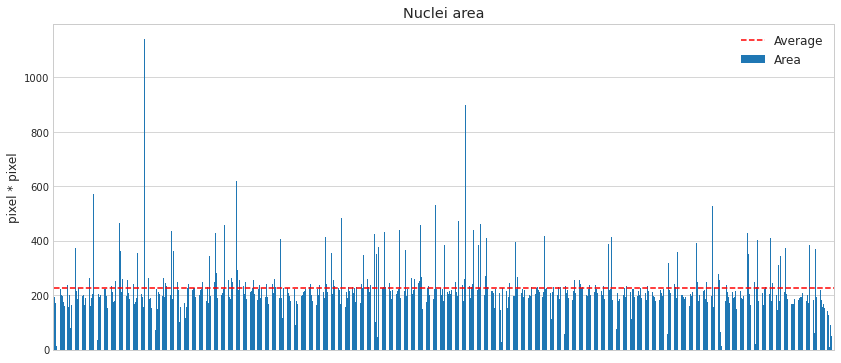

In [13]:
#Set Figure size and the coloum we wabt to plot
ax = Data.plot.bar(y='Area', width=0.6, title="Nuclei area", figsize=(14,6))
plt.hlines(y=Data_summary.at["mean","Area"], 
           xmin = 0, xmax = Data.shape[0],
           color='red',linestyle='--', label = "Average")
ax.xaxis.set_visible(False)
plt.ylabel("pixel * pixel")
ax.legend()
plt.savefig(f"{plotdir}/Nuclei Area.tiff", bbox_inches = "tight")
plt.show()

Here we summarize the nuclei feature by producing a series of BOXPLOT, one for each of the features selected in the *Set Measurements()* in the Count function.

#### Nuclei features

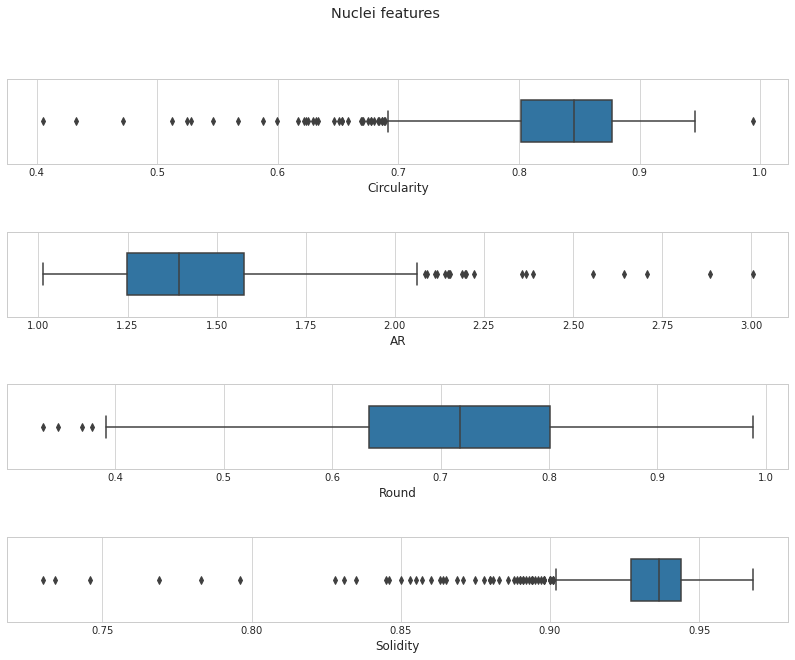

In [14]:
Data = Data.drop("Area", axis = 1)                                #Already plotted

fig, axs = plt.subplots(len(Data.columns), figsize=(14,10))       #This code works for multiple measurements
fig.suptitle('Nuclei features')
plt.subplots_adjust(hspace = 0.8)
for n in range(len(Data.columns)):
    sns.boxplot(x= Data[Data.columns[n]], data=Data, width=.5, ax=axs[n])
        #plt.figure(figsize=(14,1.5))
        #sns.boxplot(data=Data_box, x=column)
plt.savefig(f"{plotdir}/Nuclei features.", bbox_inches = "tight")

***
### CASE 2
#### Run MACRO on MULTIPLE images 
MACRO: NUCLEI PROCESS, COUNTER
***

#### Select the experimental folder

In the following situation, we want to analyse multiple samples and show as output the descriptives of the analysis. Mean, Standard Deviation, etc. <br> Get the list of the file (for Case1 there is only one file) that will be analysed

In [15]:
EXPERIMENT_FOLDER = "/Users/nicolascristini/IPAN-Project/IPAN/CASES/NucleiCount_Case2"

In [16]:
#PRINT PATH TREE
IPAN.FolderTree(EXPERIMENT_FOLDER)

NucleiCount_Case2/
├── .DS_Store
├── sample1.tif
├── sample2.tif
└── sample3.tif


#### 2 - Run the function  in a for cycle
We can run the function inside the cycle and change at each run the name of the file in input of the function.

In [17]:
file_list = [f for f in os.listdir(EXPERIMENT_FOLDER) if f.endswith(".tif" or ".TIF")]
file_list

['sample1.tif', 'sample2.tif', 'sample3.tif']

In [27]:
%%capture

file_list = [f for f in os.listdir(EXPERIMENT_FOLDER) if f.endswith(".tif" or ".TIF")]
dict_results = {}

for n in range(len(file_list)):
    #Call the function on the single file_path
    file_path = EXPERIMENT_FOLDER + "/" + file_list[n]
    results = Count_nuclei(file_path)
    
    #Open the data.csv with panda and clean the data_frame
    Data = pd.read_csv(results, header = 0, sep=',', encoding='latin-1', index_col=0)
    Data = Data.drop("Label", axis = 1)
    Data.rename(columns={'Circ.': 'Circularity'}, inplace=True)
    
    #Save the data frame in a dictionary where all the data are collected
    dict_results[file_list[n]] = Data
    
    print(file_list[n], "is processed!\n") 

 	Label	Area	Circ.	AR	Round	Solidity
1	sample1_thresholded.tif	50.700	0.701	1.983	0.504	0.892
2	sample1_thresholded.tif	193.083	0.852	1.436	0.696	0.932
3	sample1_thresholded.tif	173.225	0.752	1.455	0.687	0.920
4	sample1_thresholded.tif	12.675	0.617	2.556	0.391	0.857
5	sample1_thresholded.tif	15.633	0.680	1.905	0.525	0.860
6	sample1_thresholded.tif	180.830	0.837	1.135	0.881	0.937
7	sample1_thresholded.tif	225.615	0.756	1.395	0.717	0.945
8	sample1_thresholded.tif	78.163	0.866	1.034	0.967	0.937
9	sample1_thresholded.tif	224.770	0.753	1.609	0.621	0.926
10	sample1_thresholded.tif	202.378	0.846	1.569	0.637	0.936
11	sample1_thresholded.tif	196.040	0.883	1.288	0.776	0.936
12	sample1_thresholded.tif	176.605	0.824	1.652	0.605	0.934
13	sample1_thresholded.tif	161.818	0.855	1.313	0.761	0.927
14	sample1_thresholded.tif	265.753	0.800	1.845	0.542	0.933
15	sample1_thresholded.tif	174.915	0.891	1.186	0.843	0.936
16	sample1_thresholded.tif	151.678	0.804	1.720	0.581	0.925
17	sample1_thresholded.tif	238.7

160	sample1_thresholded.tif	227.728	0.902	1.283	0.780	0.951
161	sample1_thresholded.tif	226.460	0.841	1.301	0.768	0.931
162	sample1_thresholded.tif	193.505	0.814	1.437	0.696	0.930
163	sample1_thresholded.tif	203.223	0.867	1.289	0.776	0.935
164	sample1_thresholded.tif	196.040	0.825	1.525	0.656	0.938
165	sample1_thresholded.tif	218.855	0.873	1.188	0.842	0.931
166	sample1_thresholded.tif	62.530	0.826	1.133	0.883	0.914
167	sample1_thresholded.tif	200.265	0.859	1.312	0.762	0.934
168	sample1_thresholded.tif	219.700	0.778	1.566	0.638	0.926
169	sample1_thresholded.tif	221.813	0.920	1.065	0.939	0.949
170	sample1_thresholded.tif	248.430	0.712	1.649	0.606	0.890
171	sample1_thresholded.tif	210.828	0.798	1.469	0.681	0.930
172	sample1_thresholded.tif	217.588	0.915	1.153	0.867	0.948
173	sample1_thresholded.tif	207.448	0.835	1.286	0.778	0.928
174	sample1_thresholded.tif	208.715	0.838	1.394	0.718	0.922
175	sample1_thresholded.tif	177.450	0.884	1.373	0.728	0.935
176	sample1_thresholded.tif	230.263	0.814

392	sample1_thresholded.tif	217.165	0.896	1.130	0.885	0.940
393	sample1_thresholded.tif	223.925	0.743	1.999	0.500	0.924
394	sample1_thresholded.tif	439.400	0.691	1.519	0.658	0.864
395	sample1_thresholded.tif	190.970	0.821	1.488	0.672	0.920
396	sample1_thresholded.tif	205.335	0.852	1.534	0.652	0.940
397	sample1_thresholded.tif	363.773	0.881	1.302	0.768	0.958
398	sample1_thresholded.tif	224.348	0.759	1.825	0.548	0.930
399	sample1_thresholded.tif	230.263	0.862	1.423	0.703	0.945
400	sample1_thresholded.tif	214.630	0.797	1.669	0.599	0.924
401	sample1_thresholded.tif	365.463	0.865	1.326	0.754	0.951
402	sample1_thresholded.tif	198.998	0.896	1.173	0.853	0.939
403	sample1_thresholded.tif	221.813	0.846	1.369	0.730	0.930
404	sample1_thresholded.tif	177.028	0.777	1.708	0.585	0.926
405	sample1_thresholded.tif	218.433	0.865	1.473	0.679	0.946
406	sample1_thresholded.tif	206.180	0.910	1.211	0.826	0.938
407	sample1_thresholded.tif	230.263	0.747	1.914	0.523	0.917
408	sample1_thresholded.tif	265.330	0.86

540	sample1_thresholded.tif	205.758	0.901	1.192	0.839	0.947
541	sample1_thresholded.tif	189.280	0.910	1.143	0.875	0.945
542	sample1_thresholded.tif	201.955	0.850	1.349	0.741	0.934
543	sample1_thresholded.tif	198.998	0.837	1.417	0.706	0.929
544	sample1_thresholded.tif	229.418	0.815	1.576	0.635	0.944
545	sample1_thresholded.tif	349.830	0.794	1.563	0.640	0.946
546	sample1_thresholded.tif	228.995	0.850	1.437	0.696	0.939
547	sample1_thresholded.tif	178.295	0.852	1.316	0.760	0.924
548	sample1_thresholded.tif	49.433	0.917	1.092	0.916	0.918
549	sample1_thresholded.tif	205.335	0.779	1.388	0.721	0.918
550	sample1_thresholded.tif	227.305	0.860	1.410	0.709	0.946
551	sample1_thresholded.tif	231.953	0.766	1.475	0.678	0.938
552	sample1_thresholded.tif	218.855	0.878	1.342	0.745	0.938
553	sample1_thresholded.tif	212.095	0.858	1.343	0.745	0.931
554	sample1_thresholded.tif	424.190	0.858	1.378	0.726	0.951
555	sample1_thresholded.tif	237.868	0.811	1.566	0.638	0.936
556	sample1_thresholded.tif	370.955	0.851

696	sample1_thresholded.tif	186.745	0.790	1.620	0.617	0.919
697	sample1_thresholded.tif	195.195	0.715	1.766	0.566	0.907
698	sample1_thresholded.tif	204.490	0.827	1.558	0.642	0.933
699	sample1_thresholded.tif	59.573	0.938	1.035	0.966	0.928
700	sample1_thresholded.tif	318.988	0.906	1.146	0.873	0.957
701	sample1_thresholded.tif	218.855	0.867	1.275	0.784	0.938
702	sample1_thresholded.tif	208.715	0.822	1.452	0.689	0.942
703	sample1_thresholded.tif	198.153	0.885	1.505	0.664	0.950
704	sample1_thresholded.tif	183.365	0.831	1.630	0.614	0.936
705	sample1_thresholded.tif	209.560	0.917	1.274	0.785	0.957
706	sample1_thresholded.tif	534.463	0.723	1.301	0.769	0.902
707	sample1_thresholded.tif	240.403	0.767	1.595	0.627	0.924
708	sample1_thresholded.tif	232.375	0.826	1.543	0.648	0.936
709	sample1_thresholded.tif	189.703	0.847	1.676	0.597	0.953
710	sample1_thresholded.tif	359.548	0.741	1.532	0.653	0.915
711	sample1_thresholded.tif	176.605	0.894	1.428	0.700	0.937
712	sample1_thresholded.tif	196.885	0.894

838	sample1_thresholded.tif	179.140	0.920	1.169	0.856	0.942
839	sample1_thresholded.tif	216.743	0.776	1.590	0.629	0.920
840	sample1_thresholded.tif	169.423	0.868	1.394	0.718	0.937
841	sample1_thresholded.tif	168.578	0.810	1.312	0.762	0.915
842	sample1_thresholded.tif	168.578	0.899	1.312	0.762	0.936
843	sample1_thresholded.tif	186.745	0.890	1.451	0.689	0.953
844	sample1_thresholded.tif	177.873	0.808	1.357	0.737	0.921
845	sample1_thresholded.tif	186.745	0.846	1.252	0.799	0.940
846	sample1_thresholded.tif	197.308	0.783	1.494	0.669	0.909
847	sample1_thresholded.tif	183.788	0.865	1.212	0.825	0.924
848	sample1_thresholded.tif	184.633	0.893	1.318	0.759	0.942
849	sample1_thresholded.tif	189.280	0.814	1.821	0.549	0.933
850	sample1_thresholded.tif	193.083	0.901	1.239	0.807	0.937
851	sample1_thresholded.tif	194.350	0.870	1.302	0.768	0.933
852	sample1_thresholded.tif	207.870	0.834	1.626	0.615	0.934
853	sample1_thresholded.tif	323.635	0.875	1.366	0.732	0.947
854	sample1_thresholded.tif	193.928	0.86

141	sample2_thresholded.tif	341.803	0.795	1.423	0.703	0.912
142	sample2_thresholded.tif	23.238	0.737	1.512	0.661	0.815
143	sample2_thresholded.tif	185.478	0.824	1.607	0.622	0.939
144	sample2_thresholded.tif	236.178	0.777	1.595	0.627	0.943
145	sample2_thresholded.tif	158.015	0.843	1.471	0.680	0.932
146	sample2_thresholded.tif	336.310	0.663	1.613	0.620	0.853
147	sample2_thresholded.tif	143.650	0.807	1.699	0.589	0.926
148	sample2_thresholded.tif	166.043	0.886	1.262	0.792	0.931
149	sample2_thresholded.tif	147.875	0.887	1.145	0.873	0.922
150	sample2_thresholded.tif	231.953	0.901	1.194	0.838	0.949
151	sample2_thresholded.tif	182.943	0.904	1.170	0.855	0.943
152	sample2_thresholded.tif	297.440	0.696	2.176	0.460	0.926
153	sample2_thresholded.tif	263.640	0.730	1.220	0.819	0.903
154	sample2_thresholded.tif	10.985	0.854	1.381	0.724	0.852
155	sample2_thresholded.tif	215.475	0.706	1.235	0.810	0.889
156	sample2_thresholded.tif	70.135	0.773	1.728	0.579	0.883
157	sample2_thresholded.tif	36.758	0.493	1.

345	sample2_thresholded.tif	46.053	0.666	1.106	0.904	0.855
346	sample2_thresholded.tif	148.720	0.901	1.243	0.804	0.932
347	sample2_thresholded.tif	189.280	0.834	1.245	0.803	0.933
348	sample2_thresholded.tif	56.615	0.770	1.554	0.643	0.867
349	sample2_thresholded.tif	176.605	0.886	1.260	0.793	0.946
350	sample2_thresholded.tif	169.000	0.907	1.288	0.777	0.947
351	sample2_thresholded.tif	213.785	0.847	1.585	0.631	0.941
352	sample2_thresholded.tif	190.970	0.848	1.489	0.671	0.943
353	sample2_thresholded.tif	249.698	0.744	1.525	0.656	0.916
354	sample2_thresholded.tif	365.463	0.827	1.366	0.732	0.950
355	sample2_thresholded.tif	325.748	0.752	1.978	0.506	0.918
356	sample2_thresholded.tif	162.240	0.809	1.548	0.646	0.928
357	sample2_thresholded.tif	302.510	0.797	1.216	0.822	0.927
358	sample2_thresholded.tif	152.523	0.882	1.471	0.680	0.958
359	sample2_thresholded.tif	179.563	0.819	1.624	0.616	0.943
360	sample2_thresholded.tif	331.240	0.792	1.252	0.799	0.923
361	sample2_thresholded.tif	179.140	0.904	

552	sample2_thresholded.tif	212.518	0.745	1.851	0.540	0.908
553	sample2_thresholded.tif	196.040	0.891	1.410	0.709	0.944
554	sample2_thresholded.tif	191.393	0.850	1.606	0.623	0.942
555	sample2_thresholded.tif	182.520	0.849	1.158	0.863	0.947
556	sample2_thresholded.tif	343.070	0.768	1.731	0.578	0.941
557	sample2_thresholded.tif	288.990	0.846	1.190	0.840	0.943
558	sample2_thresholded.tif	147.030	0.795	1.783	0.561	0.935
559	sample2_thresholded.tif	188.013	0.909	1.200	0.833	0.944
560	sample2_thresholded.tif	217.165	0.766	1.941	0.515	0.930
561	sample2_thresholded.tif	235.755	0.794	1.631	0.613	0.929
562	sample2_thresholded.tif	27.463	0.957	1.076	0.929	0.890
563	sample2_thresholded.tif	191.815	0.791	1.578	0.634	0.913
564	sample2_thresholded.tif	175.760	0.850	1.399	0.715	0.938
565	sample2_thresholded.tif	175.338	0.858	1.505	0.664	0.958
566	sample2_thresholded.tif	428.415	0.753	1.609	0.622	0.908
567	sample2_thresholded.tif	204.913	0.874	1.301	0.768	0.938
568	sample2_thresholded.tif	181.675	0.913

759	sample2_thresholded.tif	213.363	0.873	1.132	0.884	0.927
760	sample2_thresholded.tif	219.278	0.839	1.586	0.630	0.942
761	sample2_thresholded.tif	145.763	0.854	1.234	0.810	0.913
762	sample2_thresholded.tif	10.140	0.517	3.316	0.302	0.738
763	sample2_thresholded.tif	191.393	0.803	1.793	0.558	0.949
764	sample2_thresholded.tif	207.448	0.854	1.331	0.751	0.950
765	sample2_thresholded.tif	175.338	0.882	1.153	0.867	0.934
766	sample2_thresholded.tif	181.675	0.804	1.395	0.717	0.915
767	sample2_thresholded.tif	215.898	0.921	1.256	0.796	0.949
768	sample2_thresholded.tif	219.278	0.799	1.623	0.616	0.933
769	sample2_thresholded.tif	193.505	0.830	1.137	0.879	0.923
770	sample2_thresholded.tif	207.025	0.811	1.271	0.787	0.924
771	sample2_thresholded.tif	221.813	0.821	1.409	0.710	0.926
772	sample2_thresholded.tif	381.095	0.761	1.578	0.634	0.917
773	sample2_thresholded.tif	217.165	0.790	1.560	0.641	0.925
774	sample2_thresholded.tif	193.928	0.811	1.430	0.699	0.925
775	sample2_thresholded.tif	301.665	0.877

968	sample2_thresholded.tif	175.338	0.830	1.261	0.793	0.925
969	sample2_thresholded.tif	204.913	0.869	1.397	0.716	0.941
970	sample2_thresholded.tif	174.915	0.853	1.328	0.753	0.923
971	sample2_thresholded.tif	191.815	0.869	1.432	0.699	0.944
972	sample2_thresholded.tif	179.140	0.831	1.623	0.616	0.928
973	sample2_thresholded.tif	478.693	0.685	2.187	0.457	0.907
974	sample2_thresholded.tif	17.745	0.951	1.089	0.918	0.884
975	sample2_thresholded.tif	92.950	0.848	1.376	0.727	0.926
976	sample2_thresholded.tif	226.038	0.900	1.205	0.830	0.954
977	sample2_thresholded.tif	191.815	0.871	1.267	0.789	0.938
978	sample2_thresholded.tif	392.080	0.807	1.482	0.675	0.941
979	sample2_thresholded.tif	225.193	0.786	1.936	0.517	0.935
980	sample2_thresholded.tif	194.773	0.831	1.318	0.759	0.936
981	sample2_thresholded.tif	218.010	0.887	1.361	0.735	0.947
982	sample2_thresholded.tif	651.073	0.730	1.939	0.516	0.934
983	sample2_thresholded.tif	244.628	0.852	1.566	0.639	0.948
984	sample2_thresholded.tif	204.068	0.914	

1151	sample2_thresholded.tif	193.083	0.766	1.580	0.633	0.923
1152	sample2_thresholded.tif	204.490	0.885	1.331	0.751	0.939
1153	sample2_thresholded.tif	365.463	0.867	1.490	0.671	0.957
1154	sample2_thresholded.tif	201.955	0.872	1.335	0.749	0.942
1155	sample2_thresholded.tif	236.178	0.835	1.500	0.667	0.936
1156	sample2_thresholded.tif	209.560	0.869	1.214	0.824	0.941
1157	sample2_thresholded.tif	177.873	0.813	1.611	0.621	0.923
1158	sample2_thresholded.tif	222.235	0.892	1.288	0.776	0.943
1159	sample2_thresholded.tif	222.658	0.889	1.297	0.771	0.949
1160	sample2_thresholded.tif	402.220	0.786	1.713	0.584	0.927
1161	sample2_thresholded.tif	188.435	0.879	1.274	0.785	0.944
1162	sample2_thresholded.tif	212.518	0.821	1.515	0.660	0.934
1163	sample2_thresholded.tif	191.393	0.833	1.566	0.639	0.935
1164	sample2_thresholded.tif	444.470	0.845	1.120	0.893	0.949
1165	sample2_thresholded.tif	191.815	0.877	1.251	0.800	0.944
1166	sample2_thresholded.tif	216.743	0.863	1.505	0.665	0.948
1167	sample2_thresholded

1309	sample2_thresholded.tif	195.195	0.786	1.358	0.736	0.939
1310	sample2_thresholded.tif	160.128	0.879	1.295	0.772	0.935
1311	sample2_thresholded.tif	178.718	0.910	1.314	0.761	0.949
1312	sample2_thresholded.tif	148.298	0.911	1.192	0.839	0.945
1313	sample2_thresholded.tif	126.328	0.840	1.438	0.695	0.961
 	Label	Area	Circ.	AR	Round	Solidity
1	sample3_thresholded.tif	58.728	0.784	1.073	0.932	0.921
2	sample3_thresholded.tif	196.885	0.652	1.755	0.570	0.889
3	sample3_thresholded.tif	247.585	0.782	1.591	0.629	0.960
4	sample3_thresholded.tif	96.753	0.821	1.381	0.724	0.942
5	sample3_thresholded.tif	62.953	0.766	1.178	0.849	0.917
6	sample3_thresholded.tif	20.703	0.862	1.551	0.645	0.933
7	sample3_thresholded.tif	93.373	0.756	1.558	0.642	0.917
8	sample3_thresholded.tif	70.558	0.775	1.266	0.790	0.933
9	sample3_thresholded.tif	102.245	0.784	1.473	0.679	0.906
10	sample3_thresholded.tif	27.040	0.871	1.344	0.744	0.895
11	sample3_thresholded.tif	160.550	0.904	1.359	0.736	0.939
12	sample3_thresholded.ti

186	sample3_thresholded.tif	127.173	0.902	1.229	0.813	0.933
187	sample3_thresholded.tif	144.918	0.849	1.383	0.723	0.920
188	sample3_thresholded.tif	184.633	0.851	1.480	0.676	0.933
189	sample3_thresholded.tif	182.520	0.744	1.794	0.557	0.900
190	sample3_thresholded.tif	147.875	0.810	1.692	0.591	0.949
191	sample3_thresholded.tif	378.983	0.693	1.441	0.694	0.887
192	sample3_thresholded.tif	175.338	0.879	1.503	0.665	0.951
193	sample3_thresholded.tif	171.958	0.923	1.242	0.805	0.948
194	sample3_thresholded.tif	155.480	0.752	1.977	0.506	0.922
195	sample3_thresholded.tif	150.410	0.800	1.610	0.621	0.923
196	sample3_thresholded.tif	130.130	0.841	1.515	0.660	0.919
197	sample3_thresholded.tif	166.888	0.837	1.406	0.711	0.921
198	sample3_thresholded.tif	176.605	0.867	1.303	0.767	0.932
199	sample3_thresholded.tif	268.710	0.587	2.016	0.496	0.855
200	sample3_thresholded.tif	351.520	0.675	1.796	0.557	0.878
201	sample3_thresholded.tif	201.533	0.853	1.393	0.718	0.922
202	sample3_thresholded.tif	180.830	0.85

366	sample3_thresholded.tif	144.073	0.804	1.323	0.756	0.913
367	sample3_thresholded.tif	185.900	0.850	1.529	0.654	0.940
368	sample3_thresholded.tif	191.815	0.890	1.372	0.729	0.948
369	sample3_thresholded.tif	276.315	0.732	1.425	0.702	0.908
370	sample3_thresholded.tif	180.408	0.815	1.337	0.748	0.920
371	sample3_thresholded.tif	167.733	0.881	1.301	0.769	0.932
372	sample3_thresholded.tif	177.028	0.936	1.103	0.906	0.951
373	sample3_thresholded.tif	177.450	0.797	1.784	0.560	0.941
374	sample3_thresholded.tif	196.463	0.769	1.971	0.507	0.924
375	sample3_thresholded.tif	179.140	0.861	1.350	0.741	0.938
376	sample3_thresholded.tif	90.838	0.771	1.662	0.602	0.945
377	sample3_thresholded.tif	128.863	0.648	1.421	0.704	0.879
378	sample3_thresholded.tif	186.323	0.852	1.534	0.652	0.939
379	sample3_thresholded.tif	156.748	0.798	1.249	0.801	0.899
380	sample3_thresholded.tif	179.140	0.780	1.120	0.893	0.899
381	sample3_thresholded.tif	329.973	0.748	1.667	0.600	0.924
382	sample3_thresholded.tif	300.398	0.801

549	sample3_thresholded.tif	194.350	0.841	1.588	0.630	0.935
550	sample3_thresholded.tif	271.245	0.517	2.707	0.369	0.844
551	sample3_thresholded.tif	201.533	0.820	1.653	0.605	0.940
552	sample3_thresholded.tif	223.925	0.776	1.851	0.540	0.937
553	sample3_thresholded.tif	220.545	0.873	1.391	0.719	0.949
554	sample3_thresholded.tif	139.003	0.874	1.320	0.758	0.935
555	sample3_thresholded.tif	193.928	0.879	1.464	0.683	0.949
556	sample3_thresholded.tif	144.495	0.887	1.228	0.815	0.931
557	sample3_thresholded.tif	488.410	0.566	1.513	0.661	0.828
558	sample3_thresholded.tif	211.673	0.792	1.465	0.683	0.935
559	sample3_thresholded.tif	193.928	0.837	1.500	0.667	0.951
560	sample3_thresholded.tif	93.795	0.590	2.474	0.404	0.867
561	sample3_thresholded.tif	182.943	0.872	1.450	0.690	0.941
562	sample3_thresholded.tif	187.590	0.921	1.287	0.777	0.952
563	sample3_thresholded.tif	219.700	0.831	1.579	0.633	0.938
564	sample3_thresholded.tif	368.843	0.671	2.223	0.450	0.899
565	sample3_thresholded.tif	180.408	0.820

738	sample3_thresholded.tif	375.180	0.639	2.247	0.445	0.885
739	sample3_thresholded.tif	460.103	0.581	1.456	0.687	0.868
740	sample3_thresholded.tif	216.320	0.801	1.728	0.579	0.942
741	sample3_thresholded.tif	111.540	0.865	1.401	0.714	0.940
742	sample3_thresholded.tif	169.000	0.807	1.483	0.674	0.930
743	sample3_thresholded.tif	302.933	0.837	1.207	0.829	0.941
744	sample3_thresholded.tif	155.058	0.885	1.419	0.705	0.941
745	sample3_thresholded.tif	160.550	0.916	1.252	0.799	0.950
746	sample3_thresholded.tif	196.040	0.802	1.579	0.633	0.932
747	sample3_thresholded.tif	367.153	0.808	1.440	0.694	0.934
748	sample3_thresholded.tif	171.535	0.757	2.044	0.489	0.926
749	sample3_thresholded.tif	156.325	0.880	1.248	0.801	0.931
750	sample3_thresholded.tif	226.460	0.885	1.376	0.727	0.948
751	sample3_thresholded.tif	179.563	0.845	1.310	0.763	0.927
752	sample3_thresholded.tif	182.943	0.686	2.103	0.475	0.888
753	sample3_thresholded.tif	545.025	0.511	1.269	0.788	0.867
754	sample3_thresholded.tif	402.220	0.86

1001	sample3_thresholded.tif	165.198	0.922	1.118	0.894	0.943
1002	sample3_thresholded.tif	152.100	0.849	1.541	0.649	0.942
1003	sample3_thresholded.tif	155.903	0.747	2.060	0.485	0.919
1004	sample3_thresholded.tif	170.690	0.840	1.342	0.745	0.916
1005	sample3_thresholded.tif	215.898	0.834	1.302	0.768	0.927
1006	sample3_thresholded.tif	192.660	0.784	1.734	0.577	0.920
1007	sample3_thresholded.tif	536.575	0.677	1.338	0.748	0.876
1008	sample3_thresholded.tif	145.340	0.857	1.566	0.639	0.934
1009	sample3_thresholded.tif	196.463	0.822	1.215	0.823	0.931
1010	sample3_thresholded.tif	137.313	0.887	1.197	0.836	0.926
1011	sample3_thresholded.tif	207.870	0.839	1.218	0.821	0.929
1012	sample3_thresholded.tif	347.718	0.746	1.594	0.627	0.896
1013	sample3_thresholded.tif	190.970	0.862	1.053	0.949	0.922
1014	sample3_thresholded.tif	109.428	0.725	1.913	0.523	0.890
1015	sample3_thresholded.tif	181.675	0.823	1.735	0.576	0.937
1016	sample3_thresholded.tif	181.253	0.823	1.442	0.693	0.923
1017	sample3_thresholded

1166	sample3_thresholded.tif	173.648	0.794	1.675	0.597	0.909
1167	sample3_thresholded.tif	197.308	0.807	1.482	0.675	0.930
1168	sample3_thresholded.tif	182.520	0.907	1.203	0.831	0.953
1169	sample3_thresholded.tif	156.748	0.793	1.550	0.645	0.906
1170	sample3_thresholded.tif	191.815	0.852	1.520	0.658	0.942
1171	sample3_thresholded.tif	169.423	0.896	1.271	0.787	0.942
1172	sample3_thresholded.tif	175.760	0.895	1.221	0.819	0.941
1173	sample3_thresholded.tif	99.288	0.869	1.387	0.721	0.923
1174	sample3_thresholded.tif	125.060	0.798	1.588	0.630	0.909
1175	sample3_thresholded.tif	98.020	0.683	1.554	0.644	0.880
1176	sample3_thresholded.tif	179.985	0.897	1.209	0.827	0.937
1177	sample3_thresholded.tif	206.180	0.862	1.183	0.846	0.932
1178	sample3_thresholded.tif	181.675	0.769	1.860	0.538	0.935
1179	sample3_thresholded.tif	179.563	0.881	1.150	0.869	0.942
1180	sample3_thresholded.tif	163.508	0.756	1.520	0.658	0.906
1181	sample3_thresholded.tif	323.213	0.835	1.503	0.666	0.945
1182	sample3_thresholded.t

1338	sample3_thresholded.tif	195.618	0.918	1.183	0.846	0.954
1339	sample3_thresholded.tif	38.448	0.790	1.056	0.947	0.850
1340	sample3_thresholded.tif	140.693	0.836	1.512	0.662	0.931
1341	sample3_thresholded.tif	327.860	0.685	1.607	0.622	0.900
1342	sample3_thresholded.tif	767.261	0.680	1.247	0.802	0.895
1343	sample3_thresholded.tif	166.888	0.876	1.453	0.688	0.940
1344	sample3_thresholded.tif	335.465	0.829	1.684	0.594	0.953
1345	sample3_thresholded.tif	454.610	0.655	1.835	0.545	0.891
1346	sample3_thresholded.tif	203.223	0.910	1.200	0.833	0.944
1347	sample3_thresholded.tif	183.788	0.863	1.411	0.709	0.944
1348	sample3_thresholded.tif	152.945	0.769	1.686	0.593	0.918
1349	sample3_thresholded.tif	35.913	0.968	1.175	0.851	0.914
1350	sample3_thresholded.tif	144.918	0.783	1.716	0.583	0.911
1351	sample3_thresholded.tif	147.030	0.834	1.491	0.671	0.927
1352	sample3_thresholded.tif	312.650	0.735	1.389	0.720	0.912
1353	sample3_thresholded.tif	106.470	0.943	1.098	0.911	0.939
1354	sample3_thresholded.t

By performing all the importing operations in the *for* cycle we obtain a dictionary of data frame where all the results are collected. For the following steps of data elaboration and visualization, we can so iterate directly on the dict_results.

In [28]:
dict_results

{'sample1.tif':         Area  Circularity     AR  Round  Solidity
                                                  
 1     50.700        0.701  1.983  0.504     0.892
 2    193.083        0.852  1.436  0.696     0.932
 3    173.225        0.752  1.455  0.687     0.920
 4     12.675        0.617  2.556  0.391     0.857
 5     15.633        0.680  1.905  0.525     0.860
 ..       ...          ...    ...    ...       ...
 884   92.528        0.696  2.025  0.494     0.934
 885   49.433        0.766  1.869  0.535     0.921
 886   35.913        0.807  1.752  0.571     0.929
 887   18.590        0.405  1.984  0.504     0.746
 888   19.013        0.758  1.996  0.501     0.928
 
 [888 rows x 5 columns],
 'sample2.tif':          Area  Circularity     AR  Round  Solidity
                                                   
 1     139.425        0.848  1.249  0.801     0.926
 2     107.315        0.859  1.111  0.900     0.977
 3      62.108        0.763  1.648  0.607     0.936
 4      44.363      

#### Plot the results and compare the different samples

In [29]:
#Create folder to save images
resultdir = results.rsplit('/', 1)[0]
plotdir = resultdir+ "/" "Plots"
try:
    os.mkdir(plotdir)
    print("Output directory created")
except FileExistsError:
        print("Output directory already exist.")

Output directory already exist.


Now we can compare the different samples. The best way to do so is to compute the descriptive data frame with the function describe, merge them in one unique data frame with all the information and finally builf the plot on the summarizing data frame. We answer the questions:

* Which one has the higher number of nuclei?
* Are all the samples having the same nuclei features?

For the following purpose, I build a function called Describe_data that takes in input the database {dict} (the results dictionary containing the data frame of each sample) and the feature {str}(one of the measurements performed). <br> Create a dictionary that will collect the descriptive statics for the selected feature from all the samples.

In [30]:
def Describe_data(database, feature):
    #Build the collecting dataframe from the all the others
    series = []
    #locals()[dict_name] = {}
    for sample in database.keys():
        ser = database[sample].describe()[feature]
        series.append(ser)
    locals()[dict_name]= pd.concat(series, axis=1, keys=dict_results.keys()).T
    #For the purpose of plotting the values of different samples is better to work on the transposed dataframe
    return locals()[dict_name]

In [31]:
#Select your feature here:

selected_feature = "Area"


In [32]:
#Create the dictionary by calling the descriptive funtion and coulped it with a newly created dataframe
dict_name = "Data_summary_" + f"{selected_feature}"
print("The data with all collection of descriptives is named:\n\n", dict_name)
locals()[dict_name] = Describe_data(database = dict_results, feature = selected_feature)

The data with all collection of descriptives is named:

 Data_summary_Area


In [33]:
Data_summary_Area

,count,mean,std,min,25%,50%,75%,max
sample1.tif,888.0,226.254223,91.129909,8.450,190.548,211.250,234.065,1140.751
sample2.tif,1313.0,212.964702,100.154643,8.450,168.578,195.618,228.150,775.288
sample3.tif,1529.0,195.157680,100.916703,8.873,148.720,176.183,210.828,792.188


**Compare the samples on the selected feature**

With the following code we select the column (feature) that we want to visualize in the bar plot. By creating only one summarizing data frame we can plot one feature. Otherwise, if we want to compare multiple features across the samples, we just need to call *Describe_data()* multiple times and get from it the measurements we are interested in.

In [34]:
#For any feature, the count column will refer to the total number of object
count = Data_summary_Area["count"].to_list()
mean = Data_summary_Area["mean"].to_list()
error_mean = Data_summary_Area["std"].to_list()

#Plot settings
labels = Data_summary_Area.index.tolist()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

Create the figure and plot the bars

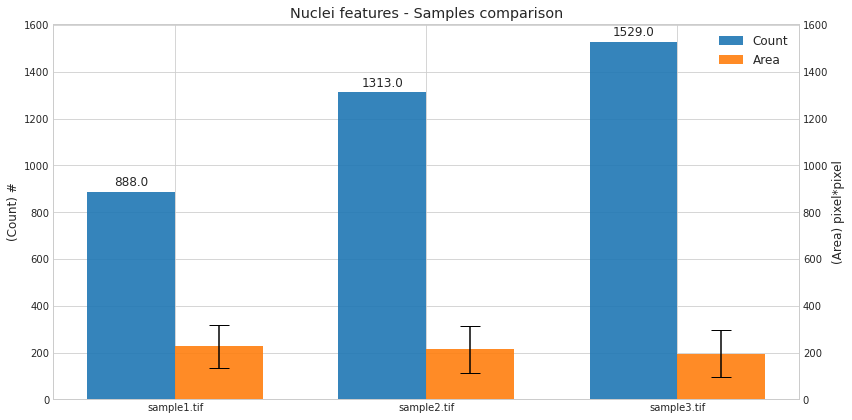

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, count, width, label='Count', alpha=0.9)
rects2 = ax.bar(x + width/2, mean, width, label= f"{selected_feature}", yerr=error_mean, alpha=0.9, ecolor='black', capsize=10)

# Add some text for labels, title and custom x-axis tick labels, etc.
secax_y = ax.secondary_yaxis('right')
secax_y.set_ylabel('(Area) pixel*pixel')
ax.set_ylabel('(Count) #')
ax.set_title('Nuclei features - Samples comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
fig.tight_layout()
plt.savefig(f"{plotdir}/Sample comparison", bbox_inches = "tight")
plt.show()

From this plot, we can see that there is a notable difference in the number of nuclei for the different samples but that the average area (selected feature) is not changing across the samples. With this template is it always possible to create a second summarizing data frame, get from it the mean and std series and plot as an additional rectangle.

***
***